In [1]:
from pathlib import Path
import os

In [2]:
from IPython.display import Image
import pandas as pd

In [3]:
import mne

Folders

In [4]:
data_bids_root = Path(os.environ['biomag2020_data-bids'])
subject_root = data_bids_root / 'derivatives' / 'test_pipeline' / 'sub-BQBBKEBX'
session_1 = subject_root / 'ses-1457629800'
session_2 = subject_root / 'ses-1458832200'

Files

In [5]:
filtered_data_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg.fif'
psd_image_before_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg_PSD_raw.png'
psd_image_after_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg_PSD_linearly_filtered.png'

filtered_data_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg.fif'
psd_image_before_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg_PSD_raw.png'
psd_image_after_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg_PSD_linearly_filtered.png'

ica_object_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg.ica'
ica_bad_ics_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg.ics.pickle'
ica_figures_1 = session_1 / 'meg' / 'sub-BQBBKEBX_ses-1457629800_task-restingstate_meg_ics_properties.pickle'

ica_object_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg.ica'
ica_bad_ics_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg.ics.pickle'
ica_figures_2 = session_2 / 'meg' / 'sub-BQBBKEBX_ses-1458832200_task-restingstate_meg_ics_properties.pickle'

In [6]:
info_1 = mne.io.read_raw_fif(filtered_data_1, verbose=False).info
info_2 = mne.io.read_raw_fif(filtered_data_2, verbose=False).info

# Subject info

In [7]:
assert info_1['subject_info']['his_id'] == info_2['subject_info']['his_id'] 
subject_id = info_1['subject_info']['his_id']

session_id_1 = info_1['meas_id']['secs']
session_id_2 = info_2['meas_id']['secs']

In [8]:
print(f'''subject ID: {subject_id}
two sessions: {session_id_1}, {session_id_2}
''')

subject ID: BQBBKEBX
two sessions: 1457629800, 1458832200



# Linear filtering

In [9]:
assert info_1['sfreq'] == info_2['sfreq']
sfreq = info_1['sfreq']

assert info_1['highpass'] == info_2['highpass']
highpass = round(info_1['highpass'], 2)

assert info_1['lowpass'] == info_2['lowpass']
lowpass = info_1['lowpass']

In [10]:
print(f'''Parameters:
sampling rate after resampling: {sfreq}
highpass: {highpass}
lowpass: {lowpass}
notch filtering: not saved automatically
''')

Parameters:
sampling rate after resampling: 300.0
highpass: 0.3
lowpass: 150.0
notch filtering: not saved automatically



## Session 1

PSD before filering:

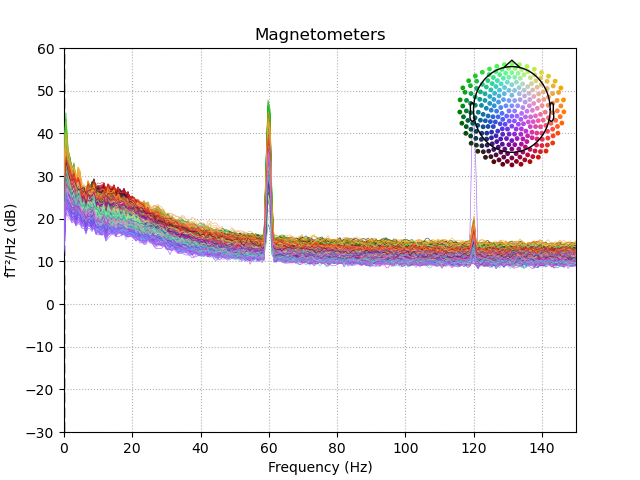

In [11]:
Image(psd_image_before_1)

PSD after filtering:

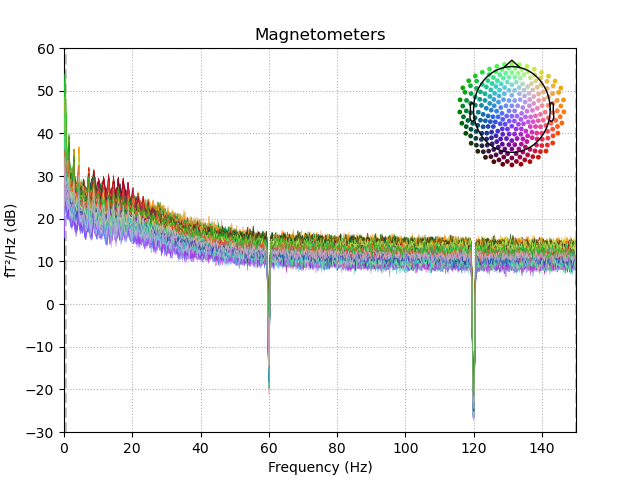

In [12]:
Image(psd_image_after_1)

## Session 2

PSD before filering:

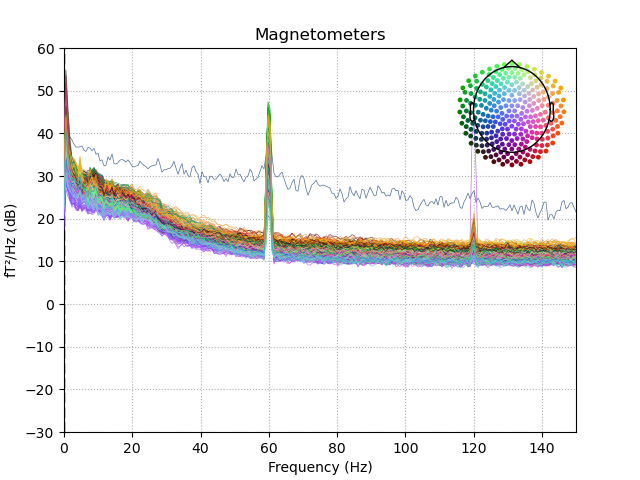

In [13]:
Image(psd_image_before_2)

PSD after filtering:

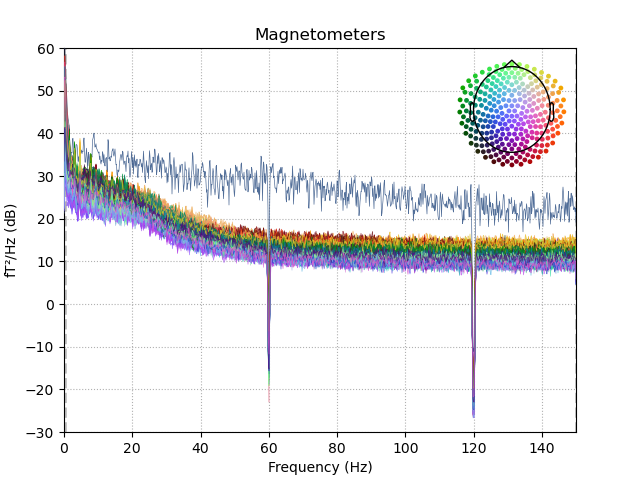

In [14]:
Image(psd_image_after_2)

# ICA

In [15]:
ica_1 = mne.preprocessing.read_ica(ica_object_1, verbose=False)
bad_ics_1 = pd.read_pickle(ica_bad_ics_1)
# figures_1 = pd.read_pickle(ica_figures_1)

ica_2 = mne.preprocessing.read_ica(ica_object_2, verbose=False)
bad_ics_2 = pd.read_pickle(ica_bad_ics_2)
# figures_2 = pd.read_pickle(ica_figures_2)

<ipython-input-15-f03b459068b0>:1: RuntimeWarning: This filename (E:\Egor_Levchenko\BIOMAG2020_competetion\data_bids\derivatives\test_pipeline\sub-BQBBKEBX\ses-1457629800\meg\sub-BQBBKEBX_ses-1457629800_task-restingstate_meg.ica) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica_1 = mne.preprocessing.read_ica(ica_object_1, verbose=False)
<ipython-input-15-f03b459068b0>:5: RuntimeWarning: This filename (E:\Egor_Levchenko\BIOMAG2020_competetion\data_bids\derivatives\test_pipeline\sub-BQBBKEBX\ses-1458832200\meg\sub-BQBBKEBX_ses-1458832200_task-restingstate_meg.ica) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica_2 = mne.preprocessing.read_ica(ica_object_2, verbose=False)


In [16]:
method = ica_1.method
n_components = ica_1.n_components
max_pca_components = ica_1.max_pca_components
n_pca_components = ica_1.n_pca_components
fit_params = ica_1.fit_params
random_state = ica_1.random_state

assert method == ica_2.method
assert n_components == ica_2.n_components
assert max_pca_components == ica_2.max_pca_components
assert n_pca_components == ica_2.n_pca_components
assert fit_params == ica_2.fit_params
assert random_state == ica_2.random_state

In [17]:
print(f'''ICA parameters:
method: {method}
n_components: {n_components}
max_pca_components: {max_pca_components}
n_pca_components: {n_pca_components}
fit_params: {fit_params}
random_state: {random_state}
''')

ICA parameters:
method: fastica
n_components: 25
max_pca_components: 272
n_pca_components: None
fit_params: {'algorithm': 'parallel', 'fun': 'logcosh', 'fun_args': None, 'max_iter': 200}
random_state: None



## Session 1

In [18]:
print(f'Identified {len(bad_ics_1)} artifactual components: {bad_ics_1}')

Identified 4 artifactual components: [0, 1, 2, 18]


## Session 2

In [19]:
print(f'Identified {len(bad_ics_2)} artifactual components: {bad_ics_2}')

Identified 3 artifactual components: [0, 3, 13]
